## Problem Statement
The typical lead conversion rate at X education is around 30%. Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. 

### Goals of case study:
-- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

-- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

In [1]:
#importing main libraries required
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import statsmodels
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

## Reading the data and understanding

In [2]:
df_leads = pd.read_csv('Leads.csv')
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
df_leads.shape

(9240, 37)

In [4]:
df_leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Data Cleaning & EDA

In [6]:
#checking for null values in data
df_leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [7]:
# checking the percentage of null values in each column
round(100*(df_leads.isnull().sum()/len(df_leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [8]:
# dropping rows with less amount of null under 2%
df_leads.dropna(axis=0, subset=['Lead Source','TotalVisits','Page Views Per Visit','Last Activity'],inplace=True)

In [9]:
round(100*(df_leads.isnull().sum()/len(df_leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     0.00
Country                                          25.30
Specialization                                   15.77
How did you hear about X Education               24.25
What is your current occupation                  29.57
What matters most to you in choosing a course    29.78
Search                                            0.00
Magazine                                          0.00
Newspaper 

### dropping the columns having high missing value of 40% or more

In [10]:
# storing column name in a variable and using for loop iteration for deleting the columns having more than 40% missing values

cols=df_leads.columns

for i in cols:
    if((100*(df_leads[i].isnull().sum()/len(df_leads.index))) >= 40):
        df_leads.drop(i, 1, inplace = True)

In [11]:
round(100*(df_leads.isnull().sum()/len(df_leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     0.00
Country                                          25.30
Specialization                                   15.77
How did you hear about X Education               24.25
What is your current occupation                  29.57
What matters most to you in choosing a course    29.78
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [12]:
df_leads.shape

(9074, 32)

### Checking distribution of data

In [13]:
# let's check variance of data in country column 
df_leads['Country'].value_counts()

India                   6491
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Canada                     4
Germany                    4
South Africa               4
Kuwait                     4
Nigeria                    4
Sweden                     3
Uganda                     2
China                      2
Bangladesh                 2
Asia/Pacific Region        2
Belgium                    2
Ghana                      2
Italy                      2
Netherlands                2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Liberia                    1
Indonesia                  1
Tanzania                   1
Denmark       

In [14]:
# as we saw the majority of data is from india which is biased we will also check the %
round(100*(df_leads['Country'].value_counts()/len(df_leads['Country'])), 2)

India                   71.53
United States            0.76
United Arab Emirates     0.58
Singapore                0.26
Saudi Arabia             0.23
United Kingdom           0.17
Australia                0.14
Qatar                    0.11
Hong Kong                0.08
Bahrain                  0.08
Oman                     0.07
France                   0.07
unknown                  0.06
Canada                   0.04
Germany                  0.04
South Africa             0.04
Kuwait                   0.04
Nigeria                  0.04
Sweden                   0.03
Uganda                   0.02
China                    0.02
Bangladesh               0.02
Asia/Pacific Region      0.02
Belgium                  0.02
Ghana                    0.02
Italy                    0.02
Netherlands              0.02
Philippines              0.02
Russia                   0.01
Switzerland              0.01
Vietnam                  0.01
Liberia                  0.01
Indonesia                0.01
Tanzania  

In [15]:
# we will also check the same for city column
round(100*(df_leads['City'].value_counts()/len(df_leads['City'])), 2)

Mumbai                         35.01
Select                         23.76
Thane & Outskirts               8.21
Other Cities                    7.49
Other Cities of Maharashtra     4.92
Other Metro Cities              4.15
Tier II Cities                  0.82
Name: City, dtype: float64

In [16]:
# checking for columns having nulls select values and are redundant 
df_leads = df_leads.drop(['Country','City'], axis = 1 )

In [17]:
df_leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Specialization                                   1431
How did you hear about X Education               2200
What is your current occupation                  2683
What matters most to you in choosing a course    2702
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [18]:
# Removing other redundant columns which are not useful for us
df_leads = df_leads.drop(['Prospect ID', 'Lead Number','Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis = 1 )

In [19]:
df_leads.isnull().sum()

Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Specialization                                   1431
How did you hear about X Education               2200
What is your current occupation                  2683
What matters most to you in choosing a course    2702
Search                                              0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement                               0
Through Recommendations     

In [20]:
df_leads.shape

(9074, 23)

In [21]:
# now let's understand the data more by categorical analysis
df_leads['Specialization'].astype('category').value_counts()

Select                               1851
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Media and Advertising                 202
Travel and Tourism                    202
International Business                176
Healthcare Management                 156
Hospitality Management                111
E-COMMERCE                            111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

### Handling 'Select' value

#### As we can notice there is 'select' value which means that it was not entered in the form or captured  and are same as missing values. As there are other columns having 'select' we will find them and convert the values to null for better analysis

In [22]:
df_leads['Lead Profile'].astype('category').value_counts()

Select                         4055
Potential Lead                 1554
Other Leads                     482
Student of SomeSchool           240
Lateral Student                  21
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [23]:
df_leads['How did you hear about X Education'].value_counts()

Select                   4886
Online Search             808
Word Of Mouth             347
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               66
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [24]:
# as we have the columns now let's convert 'select' to null
select_cols = ['Specialization','Lead Profile','How did you hear about X Education' ]
for i in select_cols:
    df_leads[i] = df_leads[i].replace('Select',np.NaN)

df_leads.isnull().sum()

Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Specialization                                   3282
How did you hear about X Education               7086
What is your current occupation                  2683
What matters most to you in choosing a course    2702
Search                                              0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement                               0
Through Recommendations     

In [25]:
# as 'lead profile' and 'how did you hear about x education' have high nulls we will drop them
df_leads = df_leads.drop(['Lead Profile','How did you hear about X Education'], axis = 1 )
df_leads.shape

(9074, 21)

In [26]:
df_leads.isnull().sum()

Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Specialization                                   3282
What is your current occupation                  2683
What matters most to you in choosing a course    2702
Search                                              0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement                               0
Through Recommendations                             0
Tags                        

In [27]:
# Now we have 4 columns left with null values we will try to impute them by analysing data
df_leads['Specialization'].value_counts()

Finance Management                   959
Human Resource Management            837
Marketing Management                 823
Operations Management                499
Business Administration              399
IT Projects Management               366
Supply Chain Management              346
Banking, Investment And Insurance    335
Media and Advertising                202
Travel and Tourism                   202
International Business               176
Healthcare Management                156
E-COMMERCE                           111
Hospitality Management               111
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [28]:
# 'Specialization' is have more than 3000 missing values so we will create a separate column of 'missing'
df_leads['Specialization'] = df_leads['Specialization'].replace(np.NaN,'Missing')
df_leads['Specialization'].value_counts()

Missing                              3282
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 156
Hospitality Management                111
E-COMMERCE                            111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [29]:
# dropping redundant column

re_col=['Last Activity', 'Tags', 'Last Notable Activity']

df_leads=df_leads.drop(re_col,axis=1)

df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
0,API,Olark Chat,No,No,0,0.0,0,0.0,Missing,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
1,API,Organic Search,No,No,0,5.0,674,2.5,Missing,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Yes
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Missing,Unemployed,Better Career Prospects,No,No,No,No,No,No,No


In [30]:
df_leads['What is your current occupation'].value_counts()

Unemployed              5476
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

In [31]:
df_leads['What is your current occupation'] = df_leads['What is your current occupation'].replace(np.NaN,'Missing')
df_leads['What is your current occupation'].value_counts()

Unemployed              5476
Missing                 2683
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

In [32]:
df_leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6370
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

#### We can observe that the data for this column is highly skewed and we cannot depend on it we will drop it

In [33]:
df_leads = df_leads.drop(['What matters most to you in choosing a course'], axis = 1 )

In [34]:
df_leads.shape

(9074, 17)

In [35]:
df_leads.isnull().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Do Not Call                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Specialization                            0
What is your current occupation           0
Search                                    0
Newspaper Article                         0
X Education Forums                        0
Newspaper                                 0
Digital Advertisement                     0
Through Recommendations                   0
A free copy of Mastering The Interview    0
dtype: int64

In [36]:
### Checking the percentage of rows retrieved after deleted nulls
print((len(df_leads.index)/9240)*100)

98.2034632034632


### Now that we have taken care of the missing values in data we can move forward in the next step of converting categorical columns of yes or no into numerical 0 / 1


In [37]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   object 
 3   Do Not Call                             9074 non-null   object 
 4   Converted                               9074 non-null   int64  
 5   TotalVisits                             9074 non-null   float64
 6   Total Time Spent on Website             9074 non-null   int64  
 7   Page Views Per Visit                    9074 non-null   float64
 8   Specialization                          9074 non-null   object 
 9   What is your current occupation         9074 non-null   object 
 10  Search                                  9074 non-null   obje

In [38]:
# creating a variable and storing the columns names for run in a loop

yesno = ['Do Not Email','Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']

cat_val={"No":0,"Yes":1}    

for i in yesno:
    df_leads[i]=df_leads[i].map(cat_val)


df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
0,API,Olark Chat,0,0,0,0.0,0,0.0,Missing,Unemployed,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Missing,Unemployed,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Business Administration,Student,0,0,0,0,0,0,1
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Media and Advertising,Unemployed,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Missing,Unemployed,0,0,0,0,0,0,0


In [39]:
df_leads.describe()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.078907,0.000220,0.378554,3.456028,482.887481,2.370151,0.001543,0.000220,0.000110,0.000110,0.000441,0.000771,0.318272
std,0.269608,0.014845,0.485053,4.858802,545.256560,2.160871,0.039251,0.014845,0.010498,0.010498,0.020992,0.027766,0.465831
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,3.000000,246.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,5.000000,922.750000,3.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,251.000000,2272.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Visualizing data for understanding data distribution and checking for outliers in 'TotalVisits', 'Total Time Spent on Website' and ' Page Views Per Visit'       

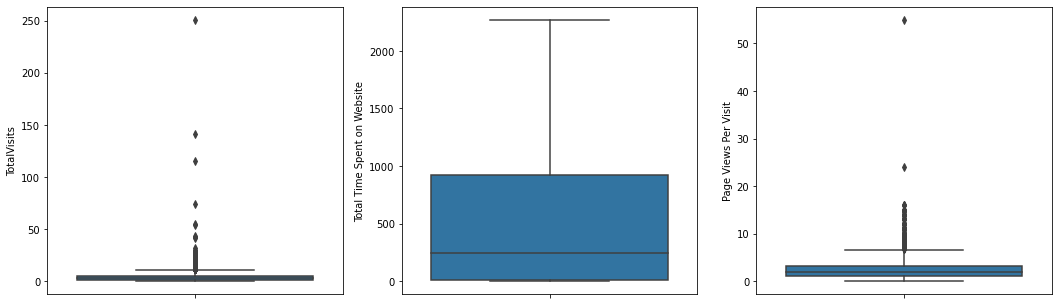

In [40]:
# size of plot
plt.figure(figsize=(18,18))
# creating matrix subplot
plt.subplot(331)
sns.boxplot(y='TotalVisits',data=df_leads)
plt.subplot(332)
sns.boxplot(y='Total Time Spent on Website',data=df_leads)
plt.subplot(333)
sns.boxplot(y='Page Views Per Visit',data=df_leads)
plt.show()

### Creating Bins

#### From the above plots we can observe that 'Total Visits' and 'Page views per visit' have outliers so we will create bins for handling them

In [41]:
label1 = ['Total_Visits_0', 'Total_Visits_1_2','Total_Visits_3_4','Total_Visits_5_6','Total_Visits_7_8','Total_Visits_9_10',
       'Total_Visits_11_12','Total_Visits_12_15','Total_Visits_above_15']

# creating bins for Total Visits
df_leads['TotalVisits'] = pd.cut(df_leads['TotalVisits'], bins=[-1,0.0,2,4,6,8,10,12,15,260], labels = label1)

In [42]:
df_leads['TotalVisits'].value_counts()

Total_Visits_3_4         2426
Total_Visits_0           2161
Total_Visits_1_2         2074
Total_Visits_5_6         1249
Total_Visits_7_8          533
Total_Visits_9_10         278
Total_Visits_11_12        131
Total_Visits_above_15     120
Total_Visits_12_15        102
Name: TotalVisits, dtype: int64

In [43]:
label2=['Page_Views_0','Page_Views_1_2','Page_Views_3_4',
            'Page_Views_5_6','Page_Views_7_8','Page_Views_9_10','Page_Views_11_20','Page_Views_above_10']

# creating bins for 'Page Views Per Visit'
df_leads['Page Views Per Visit'] = pd.cut(df_leads['Page Views Per Visit'], bins=[-1,0,2,4,6,8,10,20,60], labels = label2)

In [44]:
df_leads['Page Views Per Visit'].value_counts()

Page_Views_1_2         3006
Page_Views_3_4         2696
Page_Views_0           2161
Page_Views_5_6          851
Page_Views_7_8          237
Page_Views_9_10          73
Page_Views_11_20         48
Page_Views_above_10       2
Name: Page Views Per Visit, dtype: int64

## Creating dummy variables

In [45]:
# creating dummy variables for categorical column and dropping the first level. 
col_cat = ['Lead Origin', 'Lead Source','Specialization','What is your current occupation','TotalVisits','Page Views Per Visit']

dummy = pd.get_dummies(df_leads[col_cat], drop_first=True)
df_leads = pd.concat([df_leads,dummy],axis=1)
df_leads = df_leads.drop(col_cat, axis=1)

df_leads.head()

,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,...,TotalVisits_Total_Visits_11_12,TotalVisits_Total_Visits_12_15,TotalVisits_Total_Visits_above_15,Page Views Per Visit_Page_Views_1_2,Page Views Per Visit_Page_Views_3_4,Page Views Per Visit_Page_Views_5_6,Page Views Per Visit_Page_Views_7_8,Page Views Per Visit_Page_Views_9_10,Page Views Per Visit_Page_Views_11_20,Page Views Per Visit_Page_Views_above_10
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,674,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,1,1532,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,305,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,1428,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [46]:
df_leads.shape

(9074, 73)

## Data Preparation

In [47]:
# Now we will divide the data into train and test
y=df_leads['Converted'] 
X=df_leads.drop('Converted',1)

# Spliting the dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [48]:
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

X_train: (6351, 72)
X_test: (2723, 72)
y_train: (6351,)
y_test: (2723,)


### Scaling of data

In [49]:
scaler = MinMaxScaler()

X_train[['Total Time Spent on Website']] = scaler.fit_transform(X_train[['Total Time Spent on Website']])

X_train.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,...,TotalVisits_Total_Visits_11_12,TotalVisits_Total_Visits_12_15,TotalVisits_Total_Visits_above_15,Page Views Per Visit_Page_Views_1_2,Page Views Per Visit_Page_Views_3_4,Page Views Per Visit_Page_Views_5_6,Page Views Per Visit_Page_Views_7_8,Page Views Per Visit_Page_Views_9_10,Page Views Per Visit_Page_Views_11_20,Page Views Per Visit_Page_Views_above_10
3009,0,0,0.178347,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1012,1,0,0.085355,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9226,0,0,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4750,0,0,0.619946,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7987,0,0,0.711590,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### Checking for coorelation between all variables

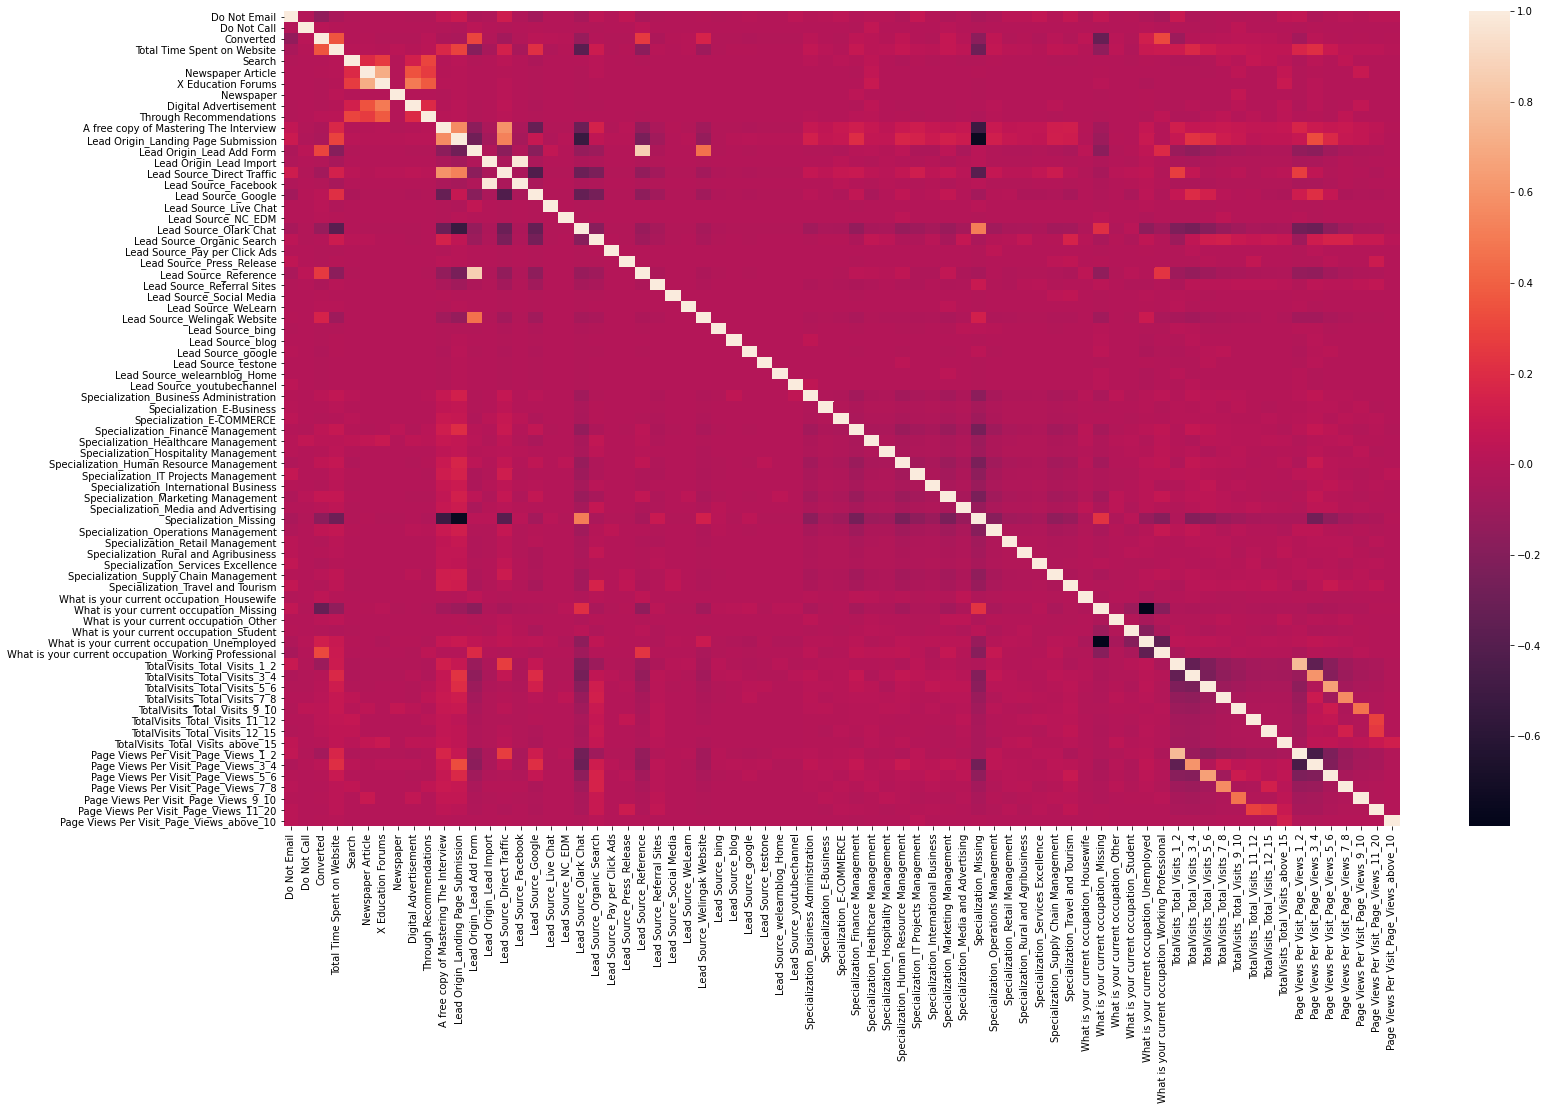

In [50]:
# correlation table
plt.figure(figsize = (25,15))
sns.heatmap(df_leads.corr())
plt.show()

As there are so many variables in dataset we will not able to identify correlation only using heatmap

## Model Building

In [51]:
# importing required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [52]:
# creating an object of logistic regression
logreg = LogisticRegression()       

rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)  # fitting the model

In [53]:
# checking which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 44),
 ('Total Time Spent on Website', True, 1),
 ('Search', False, 53),
 ('Newspaper Article', False, 20),
 ('X Education Forums', False, 19),
 ('Newspaper', True, 1),
 ('Digital Advertisement', False, 42),
 ('Through Recommendations', False, 54),
 ('A free copy of Mastering The Interview', False, 49),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 22),
 ('Lead Source_Direct Traffic', False, 32),
 ('Lead Source_Facebook', False, 10),
 ('Lead Source_Google', False, 57),
 ('Lead Source_Live Chat', False, 8),
 ('Lead Source_NC_EDM', False, 2),
 ('Lead Source_Olark Chat', False, 23),
 ('Lead Source_Organic Search', False, 35),
 ('Lead Source_Pay per Click Ads', False, 37),
 ('Lead Source_Press_Release', False, 36),
 ('Lead Source_Reference', False, 5),
 ('Lead Source_Referral Sites', False, 4),
 ('Lead Source_Social Media', False, 45),
 ('Lead Source_WeLearn'

In [54]:
# Putting all the columns selected by RFE in 'selected_col'
selected_col = X_train.columns[rfe.support_]

In [55]:
# Creating new train dataframe with RFE selected features

X_train_rfe = X_train[selected_col]
X_train_rfe.head()

,Do Not Email,Total Time Spent on Website,Newspaper,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Specialization_Missing,What is your current occupation_Housewife,What is your current occupation_Missing,What is your current occupation_Working Professional,Page Views Per Visit_Page_Views_1_2,Page Views Per Visit_Page_Views_3_4,Page Views Per Visit_Page_Views_5_6,Page Views Per Visit_Page_Views_7_8,Page Views Per Visit_Page_Views_9_10
3009,0,0.178347,0,1,0,0,0,0,1,0,1,0,0,0,0
1012,1,0.085355,0,1,0,0,1,0,0,1,1,0,0,0,0
9226,0,0.000000,0,0,0,0,1,0,0,0,0,0,0,0,0
4750,0,0.619946,0,1,0,0,0,0,1,0,1,0,0,0,0
7987,0,0.711590,0,1,0,0,0,0,0,0,0,1,0,0,0


As the columns are selected by RFE we will now check for VIF and p-value using statsmodel

In [56]:
import statsmodels.api as sm

In [57]:
# creating first model
X_train_sm = sm.add_constant(X_train_rfe)
m1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial()).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2785.6
Date:                Sun, 10 Apr 2022   Deviance:                       5571.3
Time:                        21:45:00   Pearson chi2:                 6.54e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2957      0.130      2.274      0.023       0.041       0.551
Do Not Email                                            -1.4835      0.168     -8.816      0.000      -1.813      -1.154
Total Time Spent on Website                              4.7558      0.164     29.036      0.000       4.435       5.077
Newspaper                                              -24.7652   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
Lead Origin_Landing Page Submission                     -0.9235      0.120     -7.712      0.000      -1.158      -0.689
Lead Origin_Lead Add Form                                2.2579      0.228      9.922      0.000       1.812       2.704
Lead Source_Welingak Website                             2.5410      0.751      3.382      0.001       1.068       4.014
Specialization_Missing                                  -1.0172      0.120     -8.469      0.000      -1.253      -0.782
What is your current occupation_Housewife               22.4353   1.52e+04      0.001      0.999   -2.98e+04    2.98e+04
What is your current occupation_Missing                 -1.3077      0.085    -15.423      0.000      -1.474      -1.142
What is your current occupation_Working Professional     2.3701      0.186     12.742      0.000       2.006       2.735
Page Views Per Visit_Page_Views_1_2                     -1.3447      0.120    -11.250      0.000      -1.579      -1.110
Page Views Per Visit_Page_Views_3_4                     -1.0444      0.126     -8.261      0.000      -1.292      -0.797
Page Views Per Visit_Page_Views_5_6                     -1.0859      0.152     -7.149      0.000      -1.384      -0.788
Page Views Per Visit_Page_Views_7_8                     -1.4526      0.243     -5.988      0.000      -1.928      -0.977
Page Views Per Visit_Page_Views_9_10                    -1.2551      0.398     -3.157      0.002      -2.034      -0.476
========================================================================================================================
"""

as the p values are high for 'const', 'Newspaper' and 'What is your current occupation_Housewife' we will need to drop them but before that let's check for VIF

In [58]:
# importing VIF library
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:
# creating a dataframe and checking VIF for RFE selected variables
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,4.78
11,Page Views Per Visit_Page_Views_3_4,3.41
10,Page Views Per Visit_Page_Views_1_2,3.16
1,Total Time Spent on Website,2.42
6,Specialization_Missing,1.94
12,Page Views Per Visit_Page_Views_5_6,1.84
8,What is your current occupation_Missing,1.55
4,Lead Origin_Lead Add Form,1.46
5,Lead Source_Welingak Website,1.37
9,What is your current occupation_Working Profes...,1.19


In [60]:
X_train_rfe2 = X_train_rfe.drop(['Newspaper','What is your current occupation_Housewife', ],1)

# Creating a new model 2
X_train_2=sm.add_constant(X_train_rfe2)
m2=sm.GLM(y_train,X_train_2,family=sm.families.Binomial()).fit()
m2.summary()   

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2791.4
Date:                Sun, 10 Apr 2022   Deviance:                       5582.9
Time:                        21:45:00   Pearson chi2:                 6.55e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2988      0.130      2.299      0.022       0.044       0.554
Do Not Email                                            -1.4846      0.168     -8.828      0.000      -1.814      -1.155
Total Time Spent on Website                              4.7382      0.163     29.004      0.000       4.418       5.058
Lead Origin_Landing Page Submission                     -0.9246      0.120     -7.732      0.000      -1.159      -0.690
Lead Origin_Lead Add Form                                2.2727      0.227     10.000      0.000       1.827       2.718
Lead Source_Welingak Website                             2.5276      0.751      3.364      0.001       1.055       4.000
Specialization_Missing                                  -1.0219      0.120     -8.515      0.000      -1.257      -0.787
What is your current occupation_Missing                 -1.3072      0.085    -15.429      0.000      -1.473      -1.141
What is your current occupation_Working Professional     2.3666      0.186     12.728      0.000       2.002       2.731
Page Views Per Visit_Page_Views_1_2                     -1.3338      0.119    -11.181      0.000      -1.568      -1.100
Page Views Per Visit_Page_Views_3_4                     -1.0430      0.126     -8.256      0.000      -1.291      -0.795
Page Views Per Visit_Page_Views_5_6                     -1.0821      0.152     -7.131      0.000      -1.380      -0.785
Page Views Per Visit_Page_Views_7_8                     -1.4484      0.242     -5.977      0.000      -1.923      -0.973
Page Views Per Visit_Page_Views_9_10                    -1.2503      0.397     -3.147      0.002      -2.029      -0.472
========================================================================================================================
"""

In [61]:
# checking VIF for model 2
vif=pd.DataFrame()
vif['Features']=X_train_rfe2.columns  
vif['VIF']=[variance_inflation_factor(X_train_rfe2.values,i) for i in range(X_train_rfe2.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,4.78
9,Page Views Per Visit_Page_Views_3_4,3.41
8,Page Views Per Visit_Page_Views_1_2,3.15
1,Total Time Spent on Website,2.42
5,Specialization_Missing,1.94
10,Page Views Per Visit_Page_Views_5_6,1.84
6,What is your current occupation_Missing,1.55
3,Lead Origin_Lead Add Form,1.45
4,Lead Source_Welingak Website,1.36
7,What is your current occupation_Working Profes...,1.19


As the VIF and p-values are aligned we will finalize the model 

## Predicting the train to see the model performance

In [66]:
y_train_pred=m2.predict(X_train_2)

# Creating a new dataset and saving predicted values in it
y_train_2=pd.DataFrame({'Converted':y_train.values,'Converted_Probability':y_train_pred,'ID':y_train.index})
y_train_2.head()

,Converted,Converted_Probability,ID
3009,0,0.081538,3009
1012,0,0.155120,1012
9226,0,0.326717,9226
4750,1,0.418423,4750
7987,1,0.845922,7987


In [68]:
# adding the predicted column in the y_train_2 with condition if probability of conversion is more than 0.5
y_train_2['Predicted'] = y_train_2.Converted_Probability.map(lambda x: 1 if x > 0.5 else 0)
y_train_2.head()

,Converted,Converted_Probability,ID,Predicted
3009,0,0.081538,3009,0
1012,0,0.155120,1012,0
9226,0,0.326717,9226,0
4750,1,0.418423,4750,0
7987,1,0.845922,7987,1


## ROC Curve

In [73]:
# Now let us see the roc curve 
from sklearn import metrics

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive')
    plt.ylabel('True Positive')
    plt.legend(loc="lower right")
    plt.show()

    return None

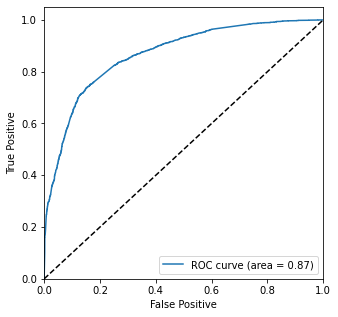

In [74]:
draw_roc(y_train_2.Converted, y_train_2.Converted_Probability)

Now that the curve is decent at 0.87 let us also check for different probability cutoffs and also see the accuracy, sensitivity, and specificity

In [76]:
#creating columns with different probability cutoff

nums = [float(x)/10 for x in range(10)]
for i in nums:
    y_train_2[i]= y_train_2.Converted_Probability.map(lambda x: 1 if x > i else 0)
y_train_2.head()

,Converted,Converted_Probability,ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
3009,0,0.081538,3009,0,1,0,0,0,0,0,0,0,0,0
1012,0,0.155120,1012,0,1,1,0,0,0,0,0,0,0,0
9226,0,0.326717,9226,0,1,1,1,1,0,0,0,0,0,0
4750,1,0.418423,4750,0,1,1,1,1,1,0,0,0,0,0
7987,1,0.845922,7987,1,1,1,1,1,1,1,1,1,1,0


In [79]:
# creating dataframe to see the values at different values of probabiity cutoffs
from sklearn.metrics import confusion_matrix

cutoff = pd.DataFrame( columns = ['prob','accu','sensi','speci'])

numb = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in numb:
    metric = metrics.confusion_matrix(y_train_2.Converted, y_train_2[i] )
    totl=sum(sum(metric))
    accuracy = (metric[0,0]+metric[1,1])/totl
    speci = metric[0,0]/(metric[0,0]+metric[0,1])
    sensi = metric[1,1]/(metric[1,0]+metric[1,1])
    cutoff.loc[i] =[ i ,accuracy,sensi,speci]
    
print(cutoff)

     prob      accu     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.538655  0.984464  0.259411
0.2   0.2  0.708235  0.900654  0.587708
0.3   0.3  0.773264  0.835241  0.734443
0.4   0.4  0.806172  0.721995  0.858899
0.5   0.5  0.804440  0.670482  0.888348
0.6   0.6  0.787435  0.577678  0.918822
0.7   0.7  0.765706  0.486917  0.940333
0.8   0.8  0.738781  0.374080  0.967222
0.9   0.9  0.706660  0.252249  0.991293


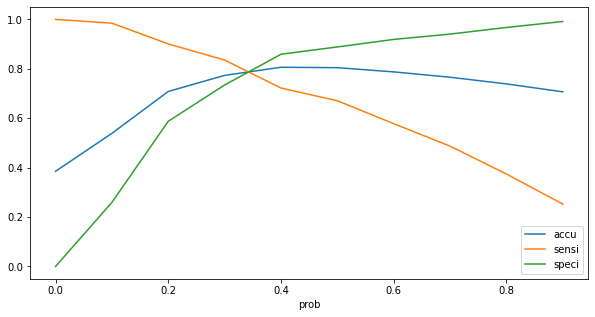

In [81]:
# let us also plot the result for better understanding
cutoff.plot.line(x='prob', y=['accu','sensi','speci'], figsize=(10,5)) 
plt.show()

From the graph we can see that the threshold is near 0.35 so let's choose it

In [82]:
y_train_2['final_pred'] = y_train_2.Converted_Probability.map( lambda x: 1 if x > 0.35 else 0)
y_train_2.head()

,Converted,Converted_Probability,ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_pred
3009,0,0.081538,3009,0,1,0,0,0,0,0,0,0,0,0,0
1012,0,0.155120,1012,0,1,1,0,0,0,0,0,0,0,0,0
9226,0,0.326717,9226,0,1,1,1,1,0,0,0,0,0,0,0
4750,1,0.418423,4750,0,1,1,1,1,1,0,0,0,0,0,1
7987,1,0.845922,7987,1,1,1,1,1,1,1,1,1,1,0,1


In [84]:
# checking for accuracy score
metrics.accuracy_score(y_train_2.Converted, y_train_2.final_pred)

80.14485907731066

### As the accuracy score is 0.8 which is good enough we will now start testing our model

In [85]:
# scaling the data for test
X_test[['Total Time Spent on Website']]=scaler.transform(X_test[['Total Time Spent on Website']])

In [87]:
# taking columns selected for final train and adding constant
test_col=X_train_2.columns[1:]             
X_test_final=X_test[test_col]             
X_test_final=sm.add_constant(X_test_final)
y_pred_test=m2.predict(X_test_final)   

In [88]:
# similarly creating dataset for saving the prediction values
y_test_pred_final=pd.DataFrame({'Converted':y_test.values,'Converted_Probability':y_pred_test,'ID':y_test.index})
y_test_pred_final.head()

,Converted,Converted_Probability,ID
3271,0,0.044232,3271
1490,1,0.659305,1490
7936,0,0.033441,7936
4216,1,0.929008,4216
3830,0,0.032889,3830


In [101]:
# adding predicted variable with the threshold of 0.35
y_test_pred_final['Predicted']=y_test_pred_final['Converted_Probability'].map(lambda x:1 if x >0.35 else 0 )
y_test_pred_final.head()

,Converted,Converted_Probability,ID,Predicted
3271,0,0.044232,3271,0
1490,1,0.659305,1490,1
7936,0,0.033441,7936,0
4216,1,0.929008,4216,1
3830,0,0.032889,3830,0


In [102]:
# checking for accuracy score
metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.Predicted)

0.7348512669849431

## Assigning the lead score 

In [106]:
y_test_pred_final['Lead_score']=y_test_pred_final['Converted_Probability'].apply(lambda x:round(x*100))
y_test_pred_final.head()

,Converted,Converted_Probability,ID,Predicted,Lead_score
3271,0,0.044232,3271,0,4
1490,1,0.659305,1490,1,66
7936,0,0.033441,7936,0,3
4216,1,0.929008,4216,1,93
3830,0,0.032889,3830,0,3


## Summary